<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [0]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-06-09 13:43:47.188915


In [0]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [0]:
# All States
states = pop['State'].tolist()
states.sort()

In [0]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [0]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [0]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

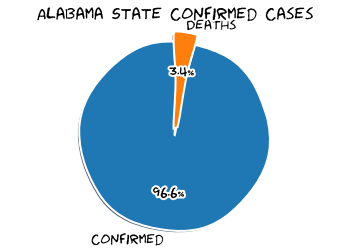

Alabama State Total Population
4887871
Alabama State Confirmed
20925 (0.42810049610556417% of population)
Alabama State Deaths
718 (3.4313022700119475% of confirmed)



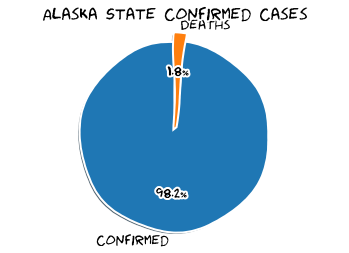

Alaska State Total Population
737438
Alaska State Confirmed
562 (0.07620979662019044% of population)
Alaska State Deaths
10 (1.7793594306049825% of confirmed)



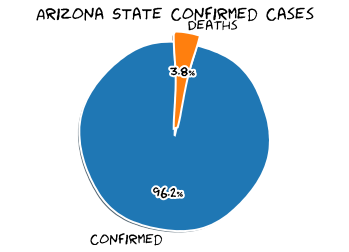

Arizona State Total Population
7171646
Arizona State Confirmed
27678 (0.38593650606848134% of population)
Arizona State Deaths
1051 (3.7972396849483343% of confirmed)



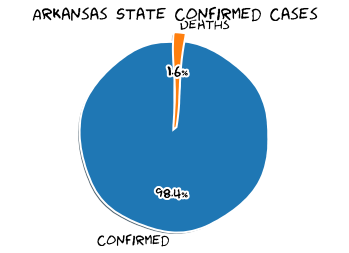

Arkansas State Total Population
3013825
Arkansas State Confirmed
9740 (0.3231773576767065% of population)
Arkansas State Deaths
155 (1.5913757700205338% of confirmed)



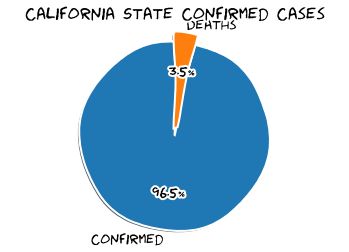

California State Total Population
39557045
California State Confirmed
133816 (0.3382861384109961% of population)
California State Deaths
4657 (3.4801518503019073% of confirmed)



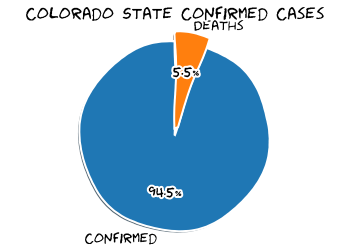

Colorado State Total Population
5695564
Colorado State Confirmed
28169 (0.49457788552634996% of population)
Colorado State Deaths
1543 (5.47765273882637% of confirmed)



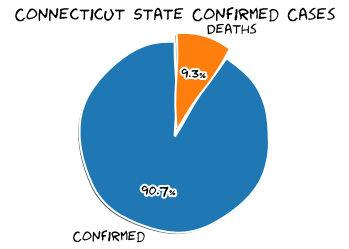

Connecticut State Total Population
3572665
Connecticut State Confirmed
44092 (1.234148737707006% of population)
Connecticut State Deaths
4084 (9.262451238319876% of confirmed)



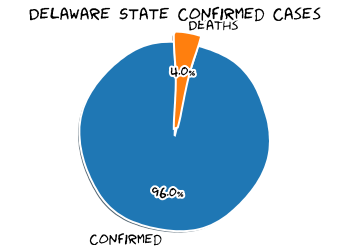

Delaware State Total Population
967171
Delaware State Confirmed
9972 (1.0310482841193542% of population)
Delaware State Deaths
398 (3.99117529081428% of confirmed)



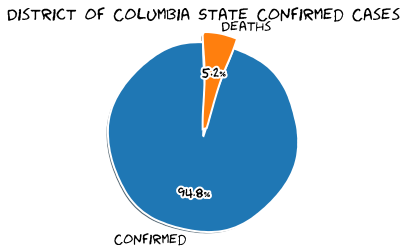

District of Columbia State Total Population
702455
District of Columbia State Confirmed
9389 (1.3365980738979721% of population)
District of Columbia State Deaths
491 (5.229523910959634% of confirmed)



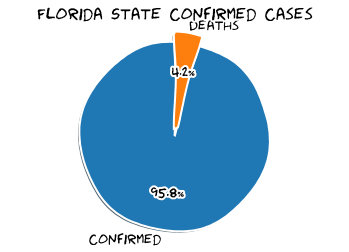

Florida State Total Population
21299325
Florida State Confirmed
64904 (0.30472327174687464% of population)
Florida State Deaths
2712 (4.1784789843461105% of confirmed)



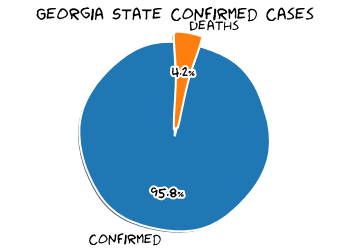

Georgia State Total Population
10519475
Georgia State Confirmed
52497 (0.4990458174005832% of population)
Georgia State Deaths
2208 (4.205954625978627% of confirmed)



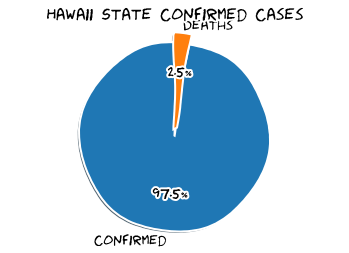

Hawaii State Total Population
1420491
Hawaii State Confirmed
676 (0.04758917867131858% of population)
Hawaii State Deaths
17 (2.514792899408284% of confirmed)



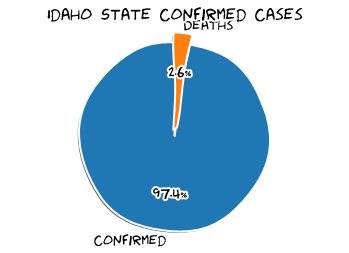

Idaho State Total Population
1754208
Idaho State Confirmed
3189 (0.1817914409237673% of population)
Idaho State Deaths
83 (2.6026967701473813% of confirmed)



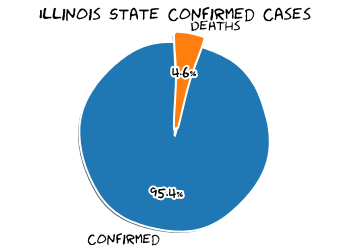

Illinois State Total Population
12741080
Illinois State Confirmed
128415 (1.0078815924552706% of population)
Illinois State Deaths
5924 (4.613168243585251% of confirmed)



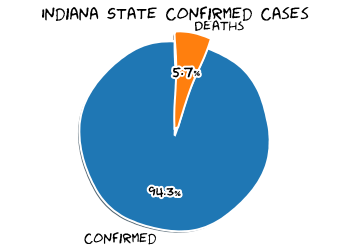

Indiana State Total Population
6691878
Indiana State Confirmed
37623 (0.5622188569486772% of population)
Indiana State Deaths
2135 (5.674720250910347% of confirmed)



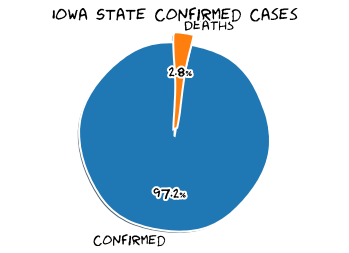

Iowa State Total Population
3156145
Iowa State Confirmed
22007 (0.6972746816131705% of population)
Iowa State Deaths
617 (2.8036533830144954% of confirmed)



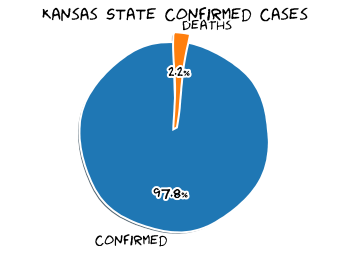

Kansas State Total Population
2911510
Kansas State Confirmed
10544 (0.36214885059642593% of population)
Kansas State Deaths
236 (2.2382397572078907% of confirmed)



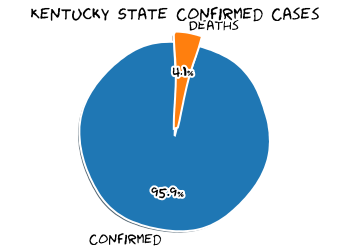

Kentucky State Total Population
4468402
Kentucky State Confirmed
11476 (0.2568255944742662% of population)
Kentucky State Deaths
472 (4.112931334959916% of confirmed)



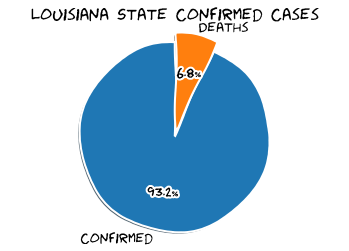

Louisiana State Total Population
4659978
Louisiana State Confirmed
43050 (0.9238241038906192% of population)
Louisiana State Deaths
2944 (6.83855981416957% of confirmed)



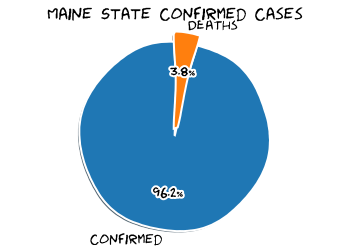

Maine State Total Population
1338404
Maine State Confirmed
2588 (0.19336463429577316% of population)
Maine State Deaths
99 (3.8253477588871716% of confirmed)



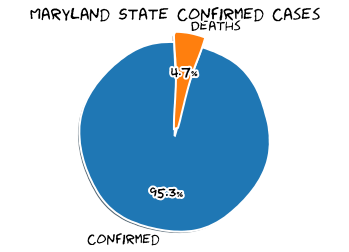

Maryland State Total Population
6042718
Maryland State Confirmed
58404 (0.9665187089650716% of population)
Maryland State Deaths
2732 (4.677761797137182% of confirmed)



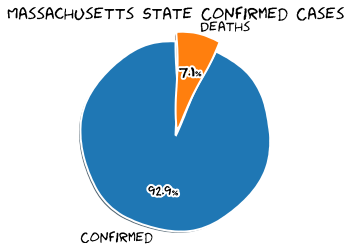

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
103626 (1.50135848994277% of population)
Massachusetts State Deaths
7353 (7.095709570957095% of confirmed)



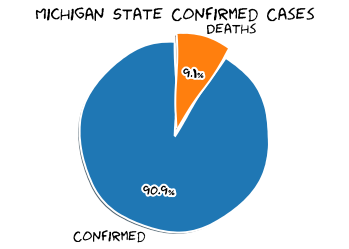

Michigan State Total Population
9995915
Michigan State Confirmed
64701 (0.6472744115971374% of population)
Michigan State Deaths
5912 (9.137416732353442% of confirmed)



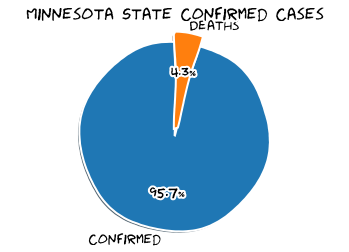

Minnesota State Total Population
5611179
Minnesota State Confirmed
28224 (0.5029958944457127% of population)
Minnesota State Deaths
1208 (4.280045351473922% of confirmed)



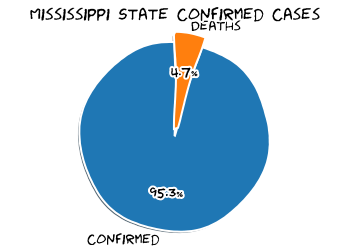

Mississippi State Total Population
2986530
Mississippi State Confirmed
17768 (0.5949379380083241% of population)
Mississippi State Deaths
837 (4.710715893741558% of confirmed)



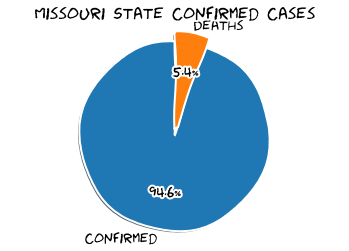

Missouri State Total Population
6126452
Missouri State Confirmed
15158 (0.24741889759358268% of population)
Missouri State Deaths
823 (5.429476184193165% of confirmed)



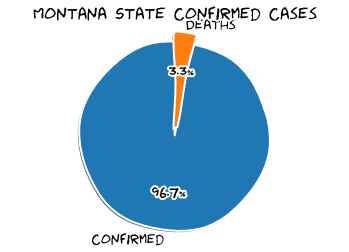

Montana State Total Population
1062305
Montana State Confirmed
548 (0.05158593812511473% of population)
Montana State Deaths
18 (3.2846715328467155% of confirmed)



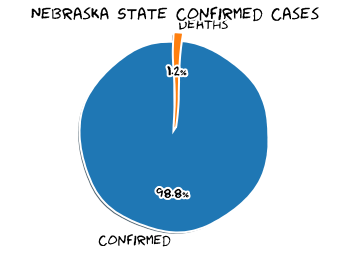

Nebraska State Total Population
1929268
Nebraska State Confirmed
15786 (0.8182377979627506% of population)
Nebraska State Deaths
188 (1.190928670974281% of confirmed)



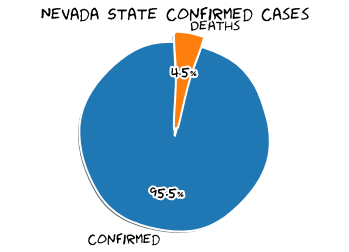

Nevada State Total Population
3034392
Nevada State Confirmed
9816 (0.32349149351830614% of population)
Nevada State Deaths
442 (4.502852485737571% of confirmed)



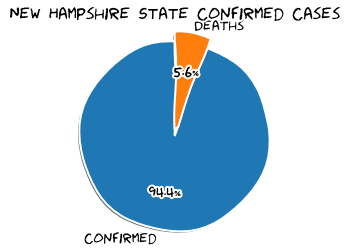

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
5079 (0.3744310549976483% of population)
New Hampshire State Deaths
286 (5.631029730261862% of confirmed)



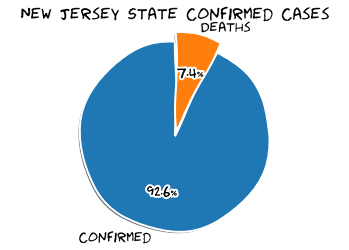

New Jersey State Total Population
8908520
New Jersey State Confirmed
164497 (1.8465132255413919% of population)
New Jersey State Deaths
12214 (7.425059423576114% of confirmed)



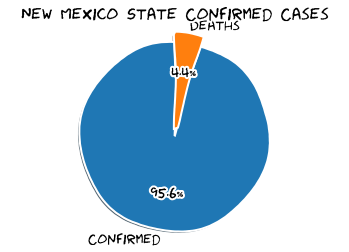

New Mexico State Total Population
2095428
New Mexico State Confirmed
9062 (0.4324653483679707% of population)
New Mexico State Deaths
400 (4.4140366365040835% of confirmed)



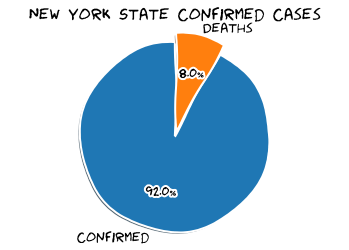

New York State Total Population
19542209
New York State Confirmed
378799 (1.9383632628225396% of population)
New York State Deaths
30417 (8.02985224353813% of confirmed)



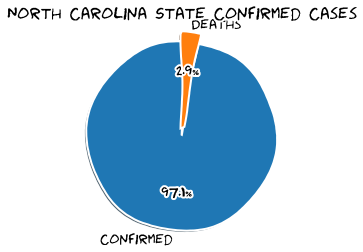

North Carolina State Total Population
10383620
North Carolina State Confirmed
36517 (0.35167889425845705% of population)
North Carolina State Deaths
1041 (2.8507270586302274% of confirmed)



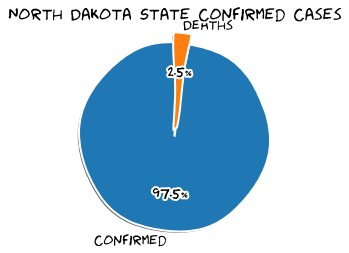

North Dakota State Total Population
760077
North Dakota State Confirmed
2880 (0.3789089789587108% of population)
North Dakota State Deaths
72 (2.5% of confirmed)



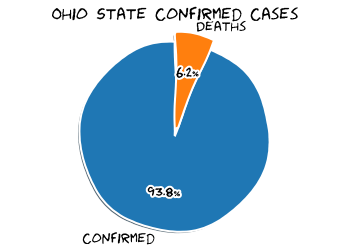

Ohio State Total Population
11689442
Ohio State Confirmed
38837 (0.33223998202822685% of population)
Ohio State Deaths
2406 (6.195123207250817% of confirmed)



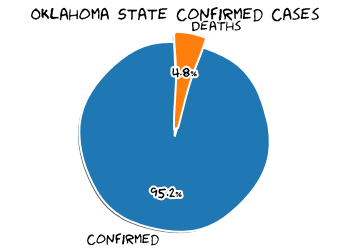

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
7205 (0.18272522564219484% of population)
Oklahoma State Deaths
348 (4.829979181124219% of confirmed)



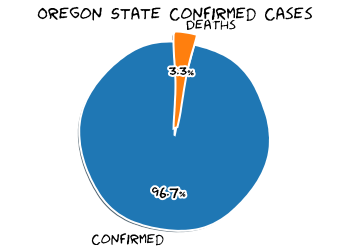

Oregon State Total Population
4190713
Oregon State Confirmed
4922 (0.11745018091193551% of population)
Oregon State Deaths
164 (3.3319788703778954% of confirmed)



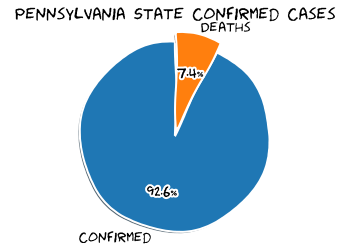

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
80339 (0.6273024409973874% of population)
Pennsylvania State Deaths
5953 (7.409850757415453% of confirmed)



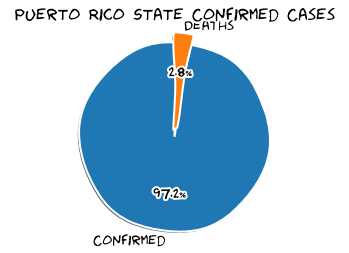

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
5046 (0.1579267096129669% of population)
Puerto Rico State Deaths
142 (2.8141101862861673% of confirmed)



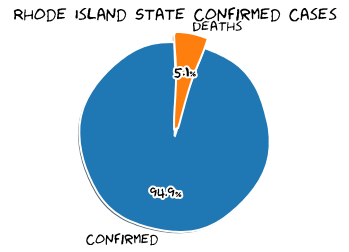

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
15642 (1.4794077450901575% of population)
Rhode Island State Deaths
799 (5.108042449814602% of confirmed)



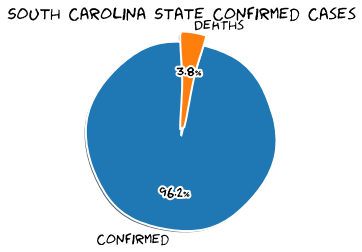

South Carolina State Total Population
5084127
South Carolina State Confirmed
14800 (0.29110209088010586% of population)
South Carolina State Deaths
557 (3.763513513513513% of confirmed)



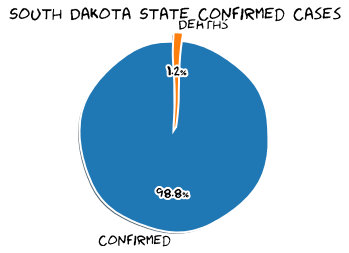

South Dakota State Total Population
882235
South Dakota State Confirmed
5471 (0.6201295573174948% of population)
South Dakota State Deaths
65 (1.1880826174373973% of confirmed)



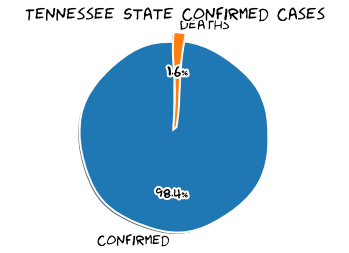

Tennessee State Total Population
6770010
Tennessee State Confirmed
27005 (0.39889158213946513% of population)
Tennessee State Deaths
421 (1.5589705610072209% of confirmed)



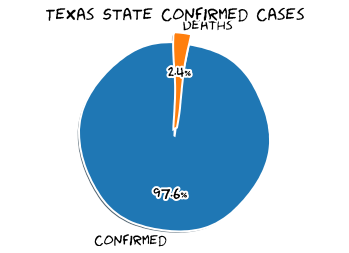

Texas State Total Population
28701845
Texas State Confirmed
76463 (0.2664044767853774% of population)
Texas State Deaths
1848 (2.416855211017093% of confirmed)



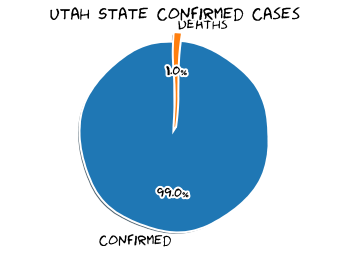

Utah State Total Population
3161105
Utah State Confirmed
12322 (0.38980040207459105% of population)
Utah State Deaths
124 (1.0063301412108423% of confirmed)



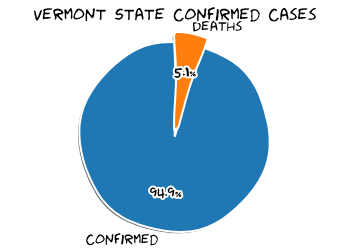

Vermont State Total Population
626299
Vermont State Confirmed
1075 (0.17164325665536748% of population)
Vermont State Deaths
55 (5.116279069767442% of confirmed)



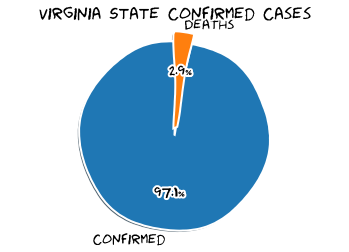

Virginia State Total Population
8517685
Virginia State Confirmed
51251 (0.6017010490526475% of population)
Virginia State Deaths
1477 (2.88189498741488% of confirmed)



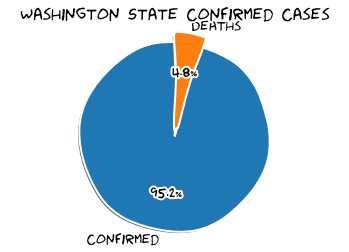

Washington State Total Population
7535591
Washington State Confirmed
24041 (0.319032707587235% of population)
Washington State Deaths
1161 (4.829250031196706% of confirmed)



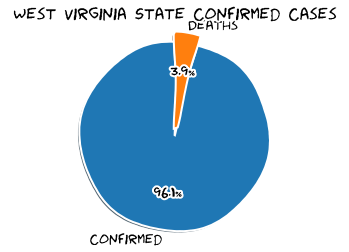

West Virginia State Total Population
1805832
West Virginia State Confirmed
2161 (0.11966783178058646% of population)
West Virginia State Deaths
84 (3.8870893105043964% of confirmed)



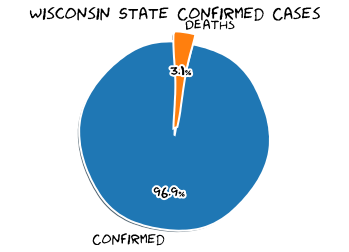

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
21038 (0.3618775939319881% of population)
Wisconsin State Deaths
646 (3.070634090693032% of confirmed)



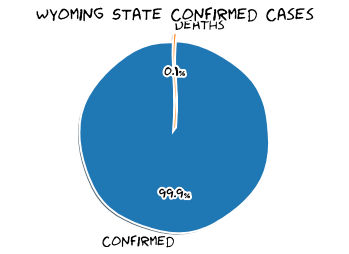

Wyoming State Total Population
577737
Wyoming State Confirmed
960 (0.16616557360875278% of population)
Wyoming State Deaths
1 (0.10416666666666667% of confirmed)



In [10]:
for i in states:
    state_details(i)

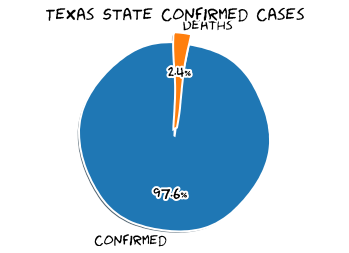

Texas State Total Population
28701845
Texas State Confirmed
76463 (0.2664044767853774% of population)
Texas State Deaths
1848 (2.416855211017093% of confirmed)



In [11]:
state_details('Texas')

In [12]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
1961185
US Deaths
110764

New York City Confirmed
207353
New York City Deaths
21877

Philippines Confirmed
22992
Philippines Deaths
1017



In [13]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 7145847},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 407067},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-06-09T12:33:09.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 3316747},
 'source': 'https://github.com/mathdroid/covid19'}

In [0]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [15]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,45001,Abbeville,South Carolina,US,2020-06-09 03:33:03,34.22333378,-82.46170658,58,0,0,58,"Abbeville, South Carolina, US",236.47408977861133,0.0
1,22001,Acadia,Louisiana,US,2020-06-09 03:33:03,30.2950649,-92.41419698,513,29,0,484,"Acadia, Louisiana, US",826.8192440970264,5.653021442495127
2,51001,Accomack,Virginia,US,2020-06-09 03:33:03,37.76707161,-75.63234615,983,13,0,970,"Accomack, Virginia, US",3041.8368609976483,1.3224821973550356
3,16001,Ada,Idaho,US,2020-06-09 03:33:03,43.4526575,-116.24155159999998,844,22,0,822,"Ada, Idaho, US",175.2539001260416,2.6066350710900474
4,19001,Adair,Iowa,US,2020-06-09 03:33:03,41.33075609,-94.47105874,9,0,0,9,"Adair, Iowa, US",125.83892617449665,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,,,,West Bank and Gaza,2020-06-09 03:33:03,31.9522,35.2332,473,3,404,66,West Bank and Gaza,9.271935478306416,0.6342494714587738
3668,,,,Western Sahara,2020-06-09 03:33:03,24.2155,-12.8858,9,1,6,2,Western Sahara,1.5067048365225253,11.11111111111111
3669,,,,Yemen,2020-06-09 03:33:03,15.552727,48.516388,496,112,23,361,Yemen,1.662980393461161,22.580645161290324
3670,,,,Zambia,2020-06-09 03:33:03,-13.133897,27.849332,1200,10,912,278,Zambia,6.527430766261625,0.8333333333333334


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1591684381000,40.767273,-73.971526,207353,0,21877,185476,New York City,36061,"New York City, New York, US",2487.196252,None,None,84036061,USA
1,Illinois,US,1591684381000,41.841448,-87.816588,82819,0,3959,78860,Cook,17031,"Cook, Illinois, US",1608.063169,None,None,84017031,USA
2,California,US,1591684381000,34.308284,-118.228241,64690,0,2656,62034,Los Angeles,06037,"Los Angeles, California, US",644.380023,None,None,84006037,USA
3,New York,US,1591684381000,40.740665,-73.589419,40947,0,2145,38802,Nassau,36059,"Nassau, New York, US",3017.634002,None,None,84036059,USA
4,New York,US,1591684381000,40.883201,-72.801217,40377,0,1935,38442,Suffolk,36103,"Suffolk, New York, US",2734.455686,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,Kansas,US,1591684381000,37.559372,-95.743233,1,0,0,1,Wilson,20205,"Wilson, Kansas, US",11.730205,None,None,84020205,USA
2993,Kentucky,US,1591684381000,37.739416,-83.493036,1,0,0,1,Wolfe,21237,"Wolfe, Kentucky, US",13.972335,None,None,84021237,USA
2994,Arkansas,US,1591684381000,35.189025,-91.243949,1,0,0,1,Woodruff,05147,"Woodruff, Arkansas, US",15.822785,None,None,84005147,USA
2995,Alaska,US,1591684381000,56.320200,-132.058373,1,0,0,1,Wrangell,02275,"Wrangell, Alaska, US",39.968026,None,None,84002275,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1591684381000,40.767273,-73.971526,207353,0,21877,185476,New York City,36061,"New York City, New York, US",2487.196252,None,None,84036061,USA
3,New York,US,1591684381000,40.740665,-73.589419,40947,0,2145,38802,Nassau,36059,"Nassau, New York, US",3017.634002,None,None,84036059,USA
4,New York,US,1591684381000,40.883201,-72.801217,40377,0,1935,38442,Suffolk,36103,"Suffolk, New York, US",2734.455686,None,None,84036103,USA
5,New York,US,1591684381000,41.162784,-73.757417,34000,0,1395,32605,Westchester,36119,"Westchester, New York, US",3514.190093,None,None,84036119,USA
22,New York,US,1591684381000,41.150279,-74.025605,13340,0,657,12683,Rockland,36087,"Rockland, New York, US",4094.674774,None,None,84036087,USA
30,New York,US,1591684381000,41.403375,-74.302408,10523,0,465,10058,Orange,36071,"Orange, New York, US",2733.672780,None,None,84036071,USA
61,New York,US,1591684381000,42.762490,-78.730637,6531,0,560,5971,Erie,36029,"Erie, New York, US",710.894283,None,None,84036029,USA
91,New York,US,1591684381000,41.764861,-73.743567,4006,0,142,3864,Dutchess,36027,"Dutchess, New York, US",1361.575430,None,None,84036027,USA
106,New York,US,1591684381000,43.146389,-77.693229,3203,0,236,2967,Monroe,36055,"Monroe, New York, US",431.805007,None,None,84036055,USA
132,New York,US,1591684381000,43.004919,-76.199712,2408,0,151,2257,Onondaga,36067,"Onondaga, New York, US",522.878088,None,None,84036067,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

378799

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1591684381000,40.767273,-73.971526,207353,0,21877,185476,New York City,36061,"New York City, New York, US",2487.196252,None,None,84036061,USA


In [20]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
55,None,Philippines,1591705989000,12.879721,121.774017,22992,4736,1017,17239,None,None,Philippines,20.981723,None,None,608,PHL,PH


In [21]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
